In [1]:
from preamble import *
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

# Model evaluation and improvement

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
logreg.score(X_test, y_test)
# we predicted the correct class on 88% of the samples in X_test

0.88

## Cross-validation

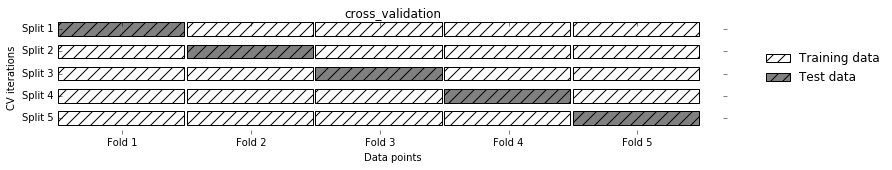

In [3]:
mglearn.plots.plot_cross_validation()

### Cross-validation in scikit-learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross-validation scores: ", scores)

cross-validation scores:  [ 0.961  0.922  0.958]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
scores

array([ 1.   ,  0.967,  0.933,  0.9  ,  1.   ])

In [6]:
scores.mean()

0.96000000000000019

## Stratified K-Fold cross-validation and other strategies

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


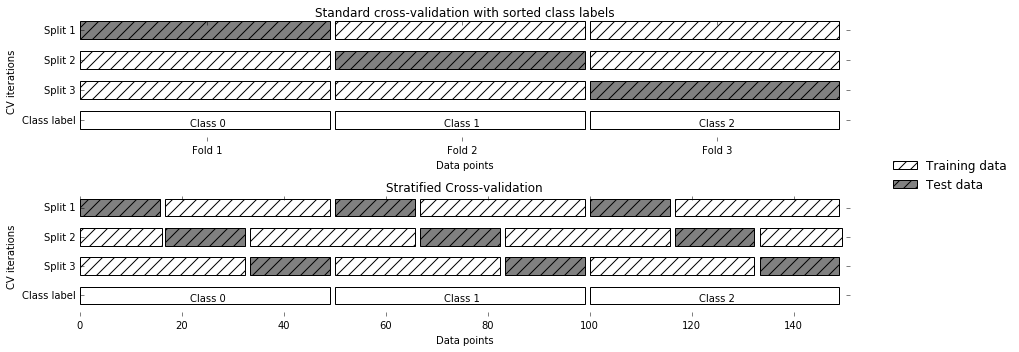

In [8]:
mglearn.plots.plot_stratified_cross_validation()

## More control over cross-validation

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [12]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([ 1.   ,  0.933,  0.433,  0.967,  0.433])

In [13]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([ 0.,  0.,  0.])

In [14]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([ 0.9 ,  0.96,  0.96])

### Leave-One-Out cross-validation

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("number of cv iterations: ", len(scores))
print("mean accuracy: ", scores.mean())

number of cv iterations:  150
mean accuracy:  0.953333333333


### Shuffle-Split cross-validation

TypeError: __init__() got an unexpected keyword argument 'n_iter'

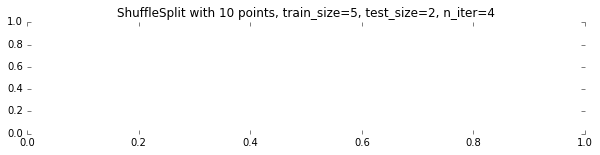

In [16]:
mglearn.plots.plot_shuffle_split()

![shuffle_split](images/06_shuffle_split.png)

In [18]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

array([ 0.973,  0.96 ,  0.96 ,  0.893,  0.88 ,  0.947,  0.867,  0.933,
        0.947,  0.96 ])

### Cross-validation with groups

In [23]:
print("label_kfold")
mglearn.plots.plot_label_kfold()

label_kfold


ImportError: cannot import name 'LabelKFold'

In [21]:
from sklearn.model_selection import GroupKFold
from mglearn.datasets import make_blobs
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group, then the next four etc.
labels = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
cross_val_score(logreg, X, y, labels, cv=GroupKFold(n_splits=3))

array([ 1. ,  0.8,  1. ])

## Grid Search

### Simple Grid-Search

In [24]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: %d   size of test set: %d" % (X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("best score: ", best_score)
print("best parameters: ", best_parameters)

Size of training set: 112   size of test set: 38
best score:  0.973684210526
best parameters:  {'C': 100, 'gamma': 0.001}


In [25]:
best_score

0.97368421052631582

### The danger of overfitting the parameters and the validation set

threefold_split


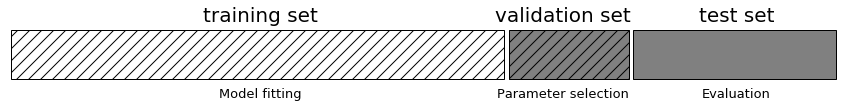

In [26]:
print("threefold_split")
mglearn.plots.plot_threefold_split()

In [27]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: %d   size of validation set: %d   size of test set: %d" % (X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set, and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)

Size of training set: 84   size of validation set: 28   size of test set: 38
best score on validation set:  0.964285714286
best parameters:  {'C': 10, 'gamma': 0.001}
test set score with best parameters:  0.921052631579


### Grid-search with cross-validation

In [28]:
# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


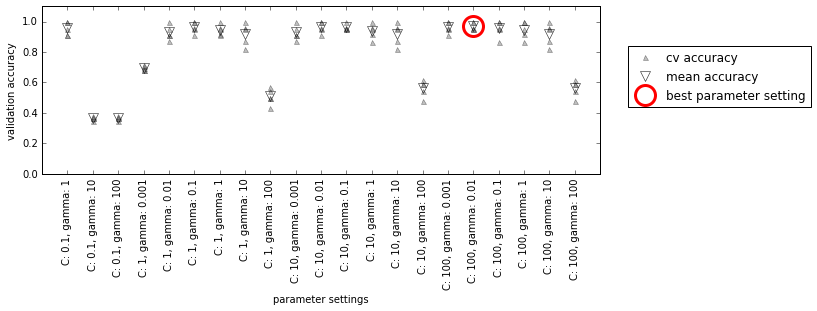

In [29]:
mglearn.plots.plot_cross_val_selection()

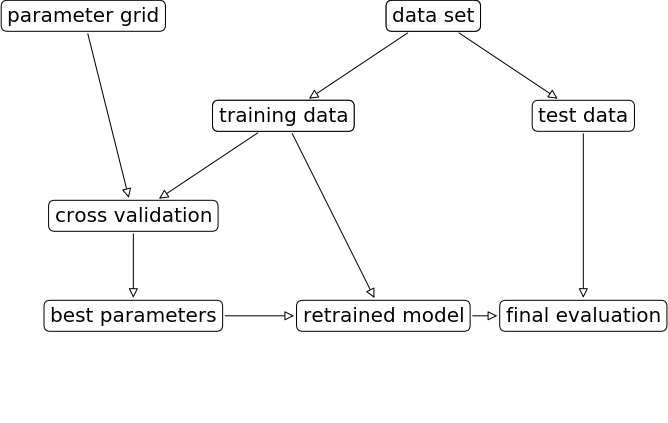

In [30]:
mglearn.plots.plot_grid_search_overview()

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
grid_search.score(X_test, y_test)

0.97368421052631582

In [36]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.01}
0.973214285714


In [37]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Analyzing the result of cross-validation

In [43]:
grid_search.grid_scores_

/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 10},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 100},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 10},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 100},
 mean: 0.36607, std: 0.01137, params: {'C': 0.1, 'gamma': 0.001},
 mean: 0.69643, std: 0.01333, params: {'C': 0.1, 'gamma': 0.01},
 mean: 0.91964, std: 0.04442, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.95536, std

/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


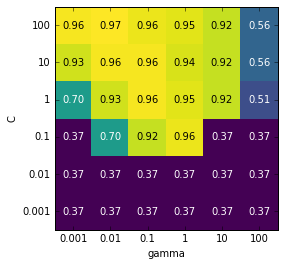

In [39]:
scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                      yticklabels=param_grid['C'], cmap="viridis")

/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be avai

gridsearch_failures


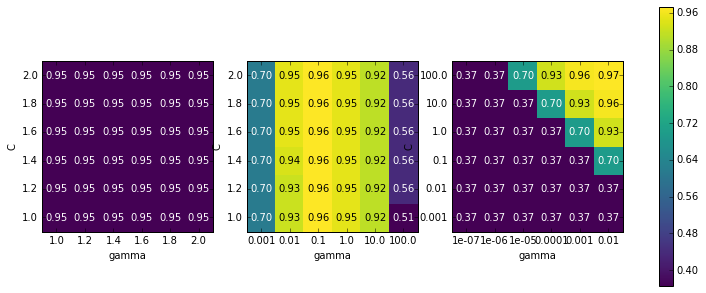

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = [score.mean_validation_score for score in grid_search.grid_scores_]
    scores = np.array(scores).reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())
print("gridsearch_failures")

### Nested cross-validation

In [45]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.967  1.     0.967  0.967  1.   ]
Mean cross-validation score:  0.98


In [46]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation:
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return outer_scores

In [47]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))

[0.96666666666666667, 1.0, 0.96666666666666667, 0.96666666666666667, 1.0]

### Parallelizing cross-validation and grid-search

# Exercises
Load the bank campaign dataset, and split it into training and test set.
Apply grid-search to the training set, searching for the best C for Logistic Regression, also search over L1 penalty vs L2 penalty.

In [ ]:
X[::113], y[::113]